In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import sklearn
import datetime
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
import boto3

In [3]:
bucket = 'bigdataprojectshippinglogsasg'
my_file = "SCMS_Delivery_History_Dataset_20150929 - SCMS_Delivery_History_Dataset_20150929_weightFormatted.csv"

In [4]:
from sagemaker import get_execution_role
role = get_execution_role()
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix='')['Contents']
for f in contents:
    print(f['Key'])

SCMS_Delivery_History_Dataset_20150929 - SCMS_Delivery_History_Dataset_20150929_weightFormatted.csv


In [5]:
import pandas as pd

data_location = 's3://{}/{}'.format(bucket, my_file)
df = pd.read_csv(data_location)

In [6]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [7]:
def read_csv(filepath):
     if os.path.splitext(filepath)[1] != '.csv':
          return  # or whatever
     seps = [',', ';', '\t']                    # ',' is default
     encodings = [None, 'utf-8', 'ISO-8859-1']  # None is default
     for sep in seps:
         for encoding in encodings:
              try:
                  return pd.read_csv(filepath, encoding=encoding, sep=sep)
              except Exception:  # should really be more specific 
                  pass
     raise ValueError("{!r} is has no encoding in {} or seperator in {}"
                      .format(filepath, encodings, seps))

In [9]:
df.shape
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10301 non-null  int64  
 1   Project Code                  10301 non-null  object 
 2   PQ #                          10301 non-null  object 
 3   PO / SO #                     10301 non-null  object 
 4   ASN/DN #                      10301 non-null  object 
 5   Country                       10301 non-null  object 
 6   Managed By                    10301 non-null  object 
 7   Fulfill Via                   10301 non-null  object 
 8   Vendor INCO Term              10301 non-null  object 
 9   Shipment Mode                 9943 non-null   object 
 10  PQ First Sent to Client Date  10301 non-null  object 
 11  PO Sent to Vendor Date        10301 non-null  object 
 12  Scheduled Delivery Date       10301 non-null  object 
 13  D

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


<AxesSubplot:>

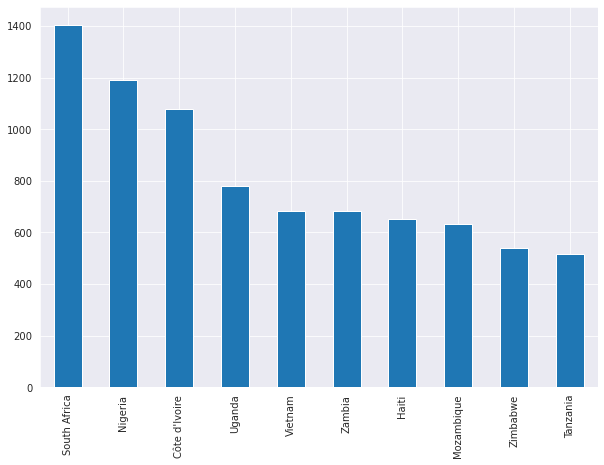

In [10]:
sns.set_style('darkgrid')
country = df['Country'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,7))
country.plot.bar(ax=ax)

In [11]:
df['Shipment Mode'].value_counts()
df['Fulfill Via'].value_counts()


From RDC       5404
Direct Drop    4897
Name: Fulfill Via, dtype: int64

In [12]:
# Convert Date fields to DateTime data type
df['PQ First Sent to Client Date'] = pd.to_datetime(df[df['PQ First Sent to Client Date']!='NA']\
                                ['PQ First Sent to Client Date'],errors='coerce',format='%m/%d/%Y')

df['PO Sent to Vendor Date'] = pd.to_datetime(df[df['PO Sent to Vendor Date']!='NA']\
                                ['PO Sent to Vendor Date'],errors='coerce',format='%m/%d/%Y')

df['Scheduled Delivery Date'] = pd.to_datetime(df[df['Scheduled Delivery Date']!='NA']\
                                ['Scheduled Delivery Date'],errors='coerce',format='%d-%b-%y')

df['Delivered to Client Date'] = pd.to_datetime(df[df['Delivered to Client Date']!='NA']\
                                ['Delivered to Client Date'],errors='coerce',format='%d-%b-%y')

df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'],errors='coerce',format='%d-%b-%y')

In [13]:
df['Delivery Period'] = df['Delivery Recorded Date'].copy()
df['Delivery Period'] = df['Delivery Period'].apply(lambda x: x.strftime('%Y%m'))

/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


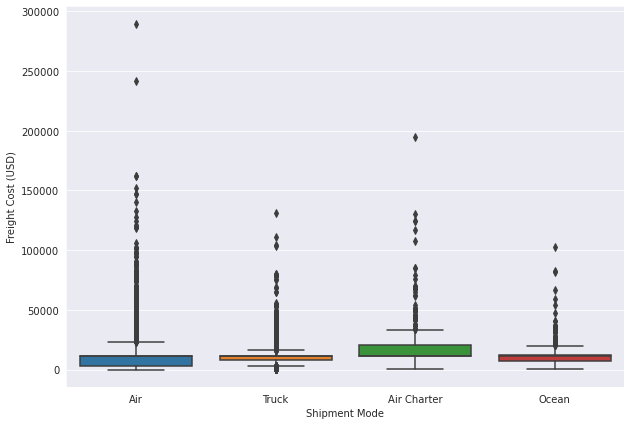

In [15]:
# Create feature to be predicted by identifying difference between scheduled and actual delivery
df['Schedule v Actual'] = df['Scheduled Delivery Date'] - df['Delivery Recorded Date']
df['Schedule v Actual'].value_counts().head(15)

# Transform Schedule v. Actual column into a categorical int value removing trailing 'days' from values
df['Schedule v Actual'] = (df['Schedule v Actual'] / np.timedelta64(1, 'D')).astype('category')
len(df['Scheduled Delivery Date'])

# Set all entries with 'Weight Captured Separately' as Null
df['Weight (Kilograms)'].replace('Weight Captured Separately',0,inplace=True)

# Replace string values with zero
df.loc[df['Weight (Kilograms)'].str.contains('See',na=False), 'Weight (Kilograms)'] = 0

df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype('int64')
df_new = df[df['Weight (Kilograms)']!=0]
mean_weight = df['Weight (Kilograms)'].mean()

# Update previously transformed zero values with mean value of data

df['Weight (Kilograms)'].replace(0,mean_weight,inplace=True)

df['Freight Cost (USD)'].value_counts().head(15)

# Apply same transformations to freight cost feature
df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0,inplace=True)
df['Freight Cost (USD)'].replace('Invoiced Separately',0,inplace=True)
df.loc[df['Freight Cost (USD)'].str.contains('See',na=False), 'Freight Cost (USD)'] = 0

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')
df_fright_new = df[df['Freight Cost (USD)']!=0]

df['Freight Cost (USD)'].replace(0,df_fright_new['Freight Cost (USD)'].mean(),inplace=True)

df['Line Item Insurance (USD)'].fillna(0,inplace=True)

fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(df['Shipment Mode'],df['Freight Cost (USD)'],ax=ax);


<AxesSubplot:ylabel='Vendor'>

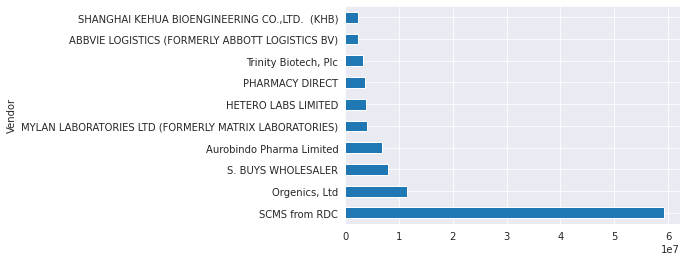

In [16]:
df.groupby('Vendor')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10).plot.barh()


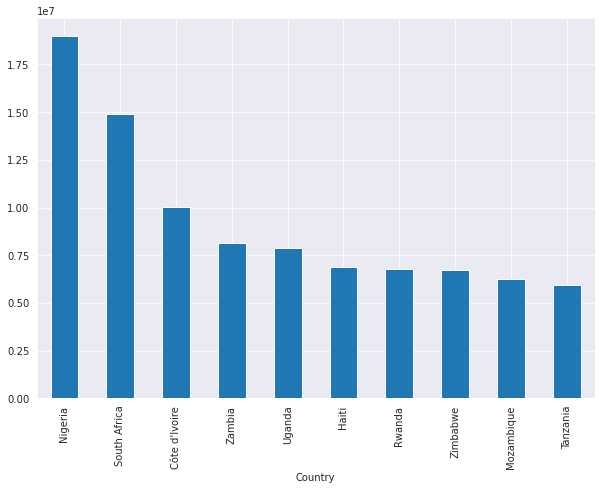

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
df.groupby('Country')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);


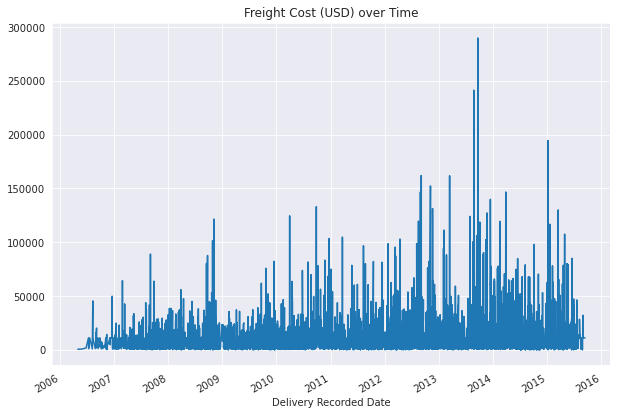

In [18]:
dt = df.set_index('Delivery Recorded Date')['Freight Cost (USD)']
fig, ax = plt.subplots(figsize=(10,7))
dt.plot(title='Freight Cost (USD) over Time');

<AxesSubplot:xlabel='Delivery Recorded Date', ylabel='Freight Cost (USD)'>

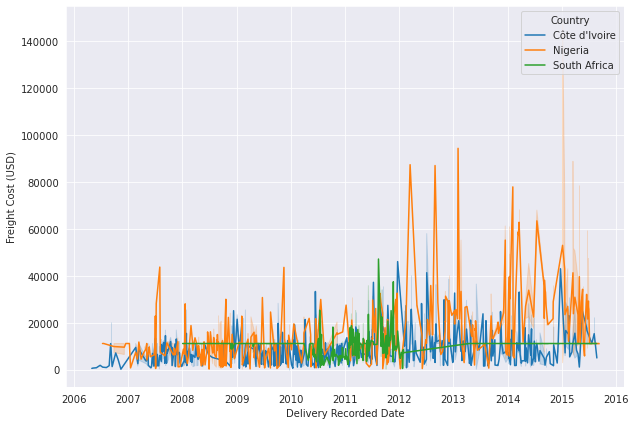

In [19]:
dtc = df[df['Country'].isin(df['Country'].value_counts().head(3).index)]
dtc = dtc.set_index('Delivery Recorded Date')[['Freight Cost (USD)','Country']]
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='Delivery Recorded Date',y='Freight Cost (USD)',data=dtc.reset_index(),hue='Country')


In [20]:
# Identify number of categorical features
for d in df.columns:
    if(df[d].dtype == 'O'):
        print(d,': ', df[d].nunique())
        

Project Code :  142
PQ # :  1237
PO / SO # :  6218
ASN/DN # :  7011
Country :  43
Managed By :  4
Fulfill Via :  2
Vendor INCO Term :  8
Shipment Mode :  4
Product Group :  5
Sub Classification :  6
Vendor :  73
Item Description :  184
Molecule/Test Type :  86
Brand :  48
Dosage :  54
Dosage Form :  17
Manufacturing Site :  88
First Line Designation :  2
Delivery Period :  113


In [21]:
dt = df.select_dtypes(include='datetime')

for col in dt.columns:
    df[col+' day'] = pd.DatetimeIndex(df[col]).day
    df[col+' month'] = pd.DatetimeIndex(df[col]).month
    df[col+' year'] = pd.DatetimeIndex(df[col]).year
    df.drop(col,axis=1,inplace=True)

In [22]:
# Drop columns w/o relevant info from analysis
df.drop(['ID','PO / SO #','ASN/DN #','PQ #'],axis=1,inplace=True)

In [23]:
df['Weight (Kilograms)'].value_counts().head()
# Identify number of categorical features
for d in df.columns:
    if(df[d].dtype == 'O'):
        print(d,': ', df[d].nunique())

df.head(15)

dt = df.select_dtypes(include='datetime')

for col in dt.columns:
    df[col+' day'] = pd.DatetimeIndex(df[col]).day
    df[col+' month'] = pd.DatetimeIndex(df[col]).month
    df[col+' year'] = pd.DatetimeIndex(df[col]).year
    df.drop(col,axis=1,inplace=True)
    
# Encode categorical fields as binary 
df_obj = pd.get_dummies(df,sparse=False,columns=df.select_dtypes(include='object').columns)


Project Code :  142
Country :  43
Managed By :  4
Fulfill Via :  2
Vendor INCO Term :  8
Shipment Mode :  4
Product Group :  5
Sub Classification :  6
Vendor :  73
Item Description :  184
Molecule/Test Type :  86
Brand :  48
Dosage :  54
Dosage Form :  17
Manufacturing Site :  88
First Line Designation :  2
Delivery Period :  113


In [24]:
df_obj.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Schedule v Actual,PQ First Sent to Client Date day,...,Delivery Period_201412,Delivery Period_201501,Delivery Period_201502,Delivery Period_201503,Delivery Period_201504,Delivery Period_201505,Delivery Period_201506,Delivery Period_201507,Delivery Period_201508,Delivery Period_201509
0,30,19,551.0,29.00,0.97,13.0,780.34,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,240,1000,6200.0,6.20,0.03,358.0,4521.50,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100,500,40000.0,80.00,0.80,171.0,1653.78,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,60,31920,127360.8,3.99,0.07,1855.0,16007.06,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,60,38000,121600.0,3.20,0.05,7590.0,45450.08,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [25]:
nums = df_obj.select_dtypes(include = 'float64')
nums.head()

,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PQ First Sent to Client Date day,PQ First Sent to Client Date month,PQ First Sent to Client Date year,PO Sent to Vendor Date day,PO Sent to Vendor Date month,PO Sent to Vendor Date year
0,551.0,29.00,0.97,13.0,780.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6200.0,6.20,0.03,358.0,4521.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,40000.0,80.00,0.80,171.0,1653.78,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,127360.8,3.99,0.07,1855.0,16007.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121600.0,3.20,0.05,7590.0,45450.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Normalize all numerical values for better model performance
from sklearn.preprocessing import normalize

for col in nums.columns:
    df_obj[col]=(df_obj[col]-df_obj[col].min())/(df_obj[col].max()-df_obj[col].min())


/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Line Item Value', ylabel='Density'>

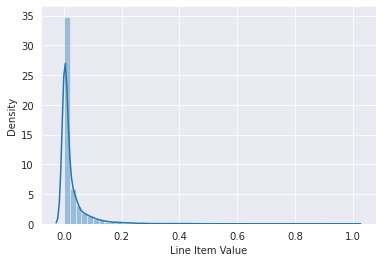

In [27]:
df_obj.select_dtypes(include='float64').head()
sns.distplot(df_obj['Line Item Value'])

/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    0
dtype: int64

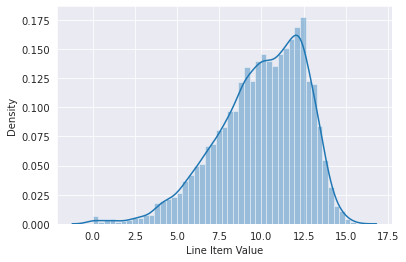

In [28]:
# Apply Log + 1 transformation to normalize skewed data while accounting for zeros.
for col in nums.columns:
    df_obj[col] = np.log(df[col]+1)

sns.distplot(df_obj['Line Item Value']);

#Establish Baseline for Delivery Date Prediction
df_obj['Schedule v Actual'] = df_obj['Schedule v Actual'].astype('int64')
df_obj['Schedule v Actual'].mode()

In [30]:
df_obj=df_obj.fillna(0)
df_obj.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Schedule v Actual,PQ First Sent to Client Date day,...,Delivery Period_201412,Delivery Period_201501,Delivery Period_201502,Delivery Period_201503,Delivery Period_201504,Delivery Period_201505,Delivery Period_201506,Delivery Period_201507,Delivery Period_201508,Delivery Period_201509
0,30,19,6.313548,3.401197,0.678034,2.639057,6.661010,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,240,1000,8.732466,1.974081,0.029559,5.883322,8.416820,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,100,500,10.596660,4.394449,0.587787,5.147494,7.411423,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,60,31920,11.754787,1.607436,0.067659,7.526179,9.680848,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,38000,11.708500,1.435085,0.048790,8.934719,10.724392,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_obj['PQ First Sent to Client Date day'].isna().sum()

0

In [32]:
df_obj.isna().sum()

Unit of Measure (Per Pack)    0
Line Item Quantity            0
Line Item Value               0
Pack Price                    0
Unit Price                    0
                             ..
Delivery Period_201505        0
Delivery Period_201506        0
Delivery Period_201507        0
Delivery Period_201508        0
Delivery Period_201509        0
Length: 903, dtype: int64

In [33]:
X_bench = df_obj.drop('Schedule v Actual',axis=1)
y_bench = df_obj['Schedule v Actual']

df_obj['y_bench_pred'] = 0


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Establish Benchmark 
rmse = sqrt(mean_squared_error(df_obj['Schedule v Actual'], df_obj['y_bench_pred']))
print('Benchmark MSE: %.3f' % rmse)

df_obj.drop('y_bench_pred',axis=1,inplace=True)


Benchmark MSE: 29.253


In [35]:
from sklearn.model_selection import train_test_split

X = df_obj.drop('Schedule v Actual',axis=1).values
y = df_obj['Schedule v Actual'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training data contains %.0f records'%len(X_train))
print('Test data contains %.0f records'%len(X_test))
X

Training data contains 6901 records
Test data contains 3400 records


array([[3.00000000e+01, 1.90000000e+01, 6.31354805e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.40000000e+02, 1.00000000e+03, 8.73246585e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+02, 5.00000000e+02, 1.05966597e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.00000000e+01, 5.14526000e+05, 1.54525862e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.00000000e+01, 1.74650000e+04, 1.16428373e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 3.66390000e+04, 1.11970169e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [36]:
#Create model for Delivery Date Prediction
from keras.models import Sequential
from keras.layers import Dense

def fit_model(nb_epoch, batch_size):
    model = Sequential()
    model.add(Dense(1024,input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile model
    model.compile(loss='mean_squared_error',optimizer='Adam')
    for i in range(nb_epoch):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [37]:
model = fit_model(150,256)
train_pred = model.predict(X_train)
train_mse = mean_squared_error(train_pred,y_train)
print('Training RMSE is %.2f' % sqrt(train_mse))

2022-12-12 23:12:09.594440: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-12 23:12:09.594509: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-153-212.ec2.internal): /proc/driver/nvidia/version does not exist
2022-12-12 23:12:09.597757: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 23:12:10.301568: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24898808 exceeds 10% of free system memory.
2022-12-12 23:12:14.933083: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24898808 exceeds 10% of free system mem

Training RMSE is 25.86


In [38]:
test_pred = model.predict(X_test)
test_mse = mean_squared_error(test_pred, y_test)
print('Test RMSE is %.2f' % sqrt(test_mse))
print(test_pred)

Test RMSE is 24.73
[[-4.9330645 ]
 [ 3.9183207 ]
 [-0.89348364]
 ...
 [-5.4603434 ]
 [ 4.213155  ]
 [ 4.1125383 ]]


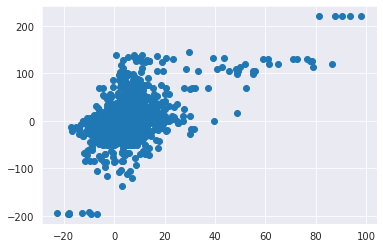

In [39]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(test_pred,y_test)

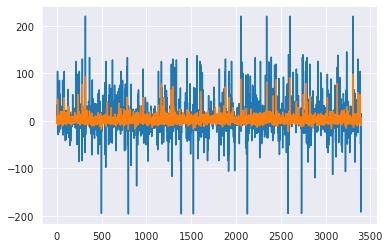

In [40]:
plt.plot(y_test)
plt.plot(test_pred)
plt.show()